In [3]:
# Imports de utilidades de Python
import numpy as np
import matplotlib.pyplot as plt

from functions import *

In [4]:

# choose a number of time steps
look_back = 5

# Cantidad de valores por cada paso temporal
n_features = 1

# Cantidad de pasos que queremos predecir hacia adelante
#pasos_adelante = 100
#indice_inicial = 0

window_size = 50

# longitud de la cadena izquierda
len_left_chain = 500

# longitud de la cadena derecha
len_right_chain = 720

# Proporcion entre train y test
#proporcion = 0.75

# Cantidad de pasos que queremos predecir hacia adelante
#pasos_adelante = 100
indice_inicial = 0







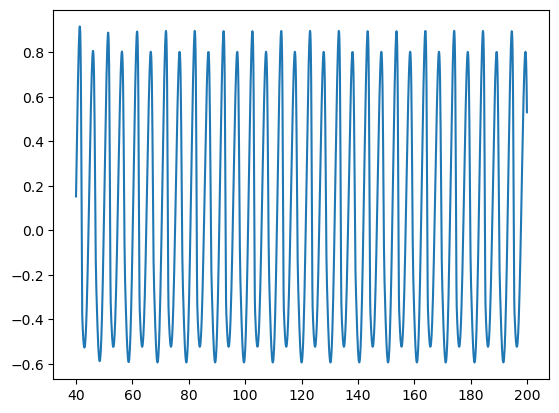

In [5]:
# Generamos la señal temporal
#raw_seq = np.sin(2*np.pi * 2 * t) + 0.5 * np.sin(2*np.pi * t)#+np.cos(2*np.pi * 3 * t)


# Parameters for the Rössler attractor
a = 0.2
b = 0.2
c = 5.7

# Time step and number of steps
dt = 0.1
num_steps = 2000

#Vector de tiempos
#t = np.linspace(0,dt*num_steps,num_steps+1)
t = np.arange(0, num_steps * dt, dt)

# Generate the time sequence for the Rössler attractor
raw_seq, _, _ = rossler_attractor(a, b, c, dt, num_steps)
# Maximo de la señal para normalizar
maximo = np.max(np.abs(raw_seq))
# Normalizamos
raw_seq = raw_seq/maximo

#Acortamos la secuencia para que no sea tan larga y que sea una secuencia osilatoria con masomenos la misma amplitud
raw_seq = raw_seq[400:]
t = t[400:]


plt.plot(t, raw_seq)

In [6]:
raw_seq_1 = raw_seq[0:len_left_chain]
t_1 = t[0:len_left_chain]

print(len(raw_seq_1),len_left_chain)

500 500


In [7]:
raw_seq_2 = raw_seq[len_left_chain+window_size:len_left_chain+window_size + len_right_chain]
t_2 = t[len_left_chain+window_size:len_left_chain+window_size + len_right_chain]

raw_seq_2_bw = raw_seq_2[::-1]
t_2_bw = t_2[::-1]

print(len(raw_seq_2),len_right_chain)

720 720


In [8]:
t_window = t[len_left_chain:len_left_chain+window_size]
raw_seq_window = raw_seq[len_left_chain:len_left_chain+window_size]
print(len(raw_seq_window),window_size)

50 50


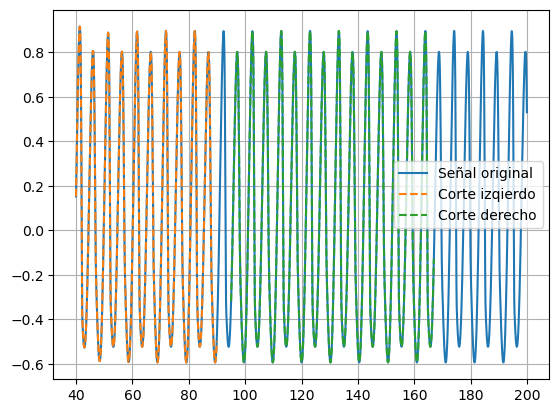

In [9]:
plt.plot(t,raw_seq, label='Señal original')
plt.plot(t_1,raw_seq_1, '--', label='Corte izqierdo')
plt.plot(t_2,raw_seq_2, '--', label='Corte derecho')
plt.grid()
plt.legend()
plt.show()

In [10]:
print('t_1 limits:',t_1[0],t_1[-1])
print('t_window limits:', t_window[0],t_window[-1])
print('t_2 limits:',t_2[0],t_2[-1])
print('t limits:',t[0],t[-1])
print('len of times:', len(t_1),len(t_window),len(t_2),len(t))

t_1 limits: 40.0 89.9
t_window limits: 90.0 94.9
t_2 limits: 95.0 166.9
t limits: 40.0 199.9
len of times: 500 50 720 1600


In [11]:
y_train_1, y_test_1, predicciones_adelante_1,valores_reales_1 = make_predictions(raw_seq_1, look_back, n_features, raw_seq_window)

2024-11-06 19:24:51.831211: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 30ms/step


"\n# split into samples\nX_train_1, y_train_1 = split_sequence(raw_seq_1, look_back)\n# Le damos la forma adecuada a los datos para entrar a la red recurrente\n# reshape from [samples, timesteps] into [samples, look_back, features]\nX_train_1 = X_train_1.reshape((X_train_1.shape[0], X_train_1.shape[1], n_features))\n\n\nX_test_1, y_test_1 = split_sequence(raw_seq_window, look_back)\nX_test_1 = X_test_1.reshape((X_test_1.shape[0], X_test_1.shape[1], n_features))\n\n# Definimos el modelo Secuencial\nmodel = Sequential()\n# Agregamos la capa Recurrente (Puede ser LSTM o RNN)\nmodel.add(SimpleRNN(10, activation='tanh', input_shape=(look_back, n_features)))\n# model.add(LSTM(20, activation='tanh', input_shape=(look_back, n_features)))\n# Agregamos la capa de salida (lee el hidden Space de la recurrente)\nmodel.add(Dense(1,activation='linear'))\n# Compilamos el modelo\nmodel.compile(optimizer='adam', loss='mse')\nhistory = model.fit(X_train_1, y_train_1, epochs=200, verbose=0,validation_data

In [16]:
# Calculamos el error
diferencia_1 = np.abs(predicciones_adelante_1-raw_seq_window)

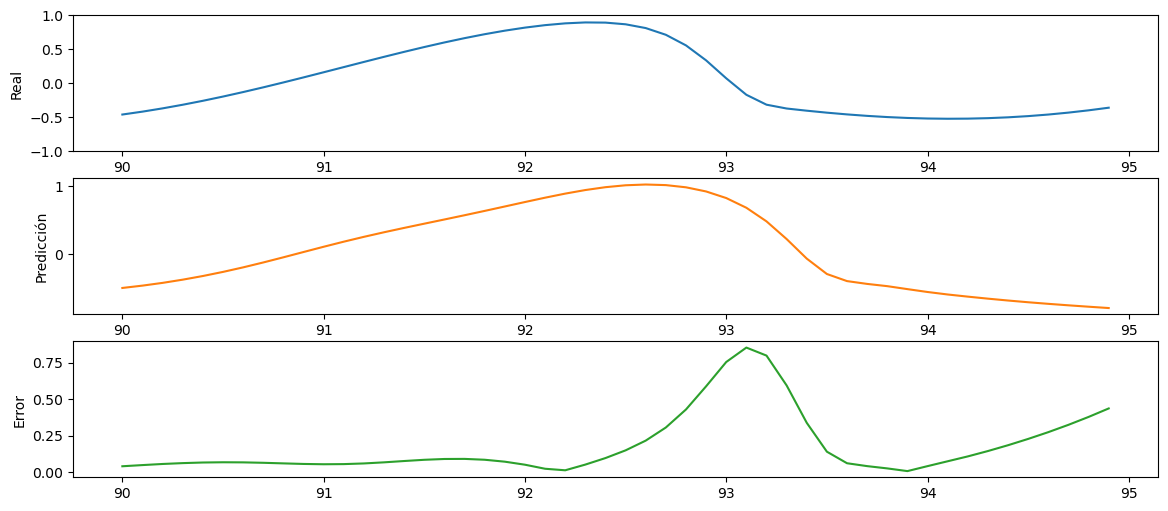

In [13]:
fig = plt.figure(figsize = (14,6))
plt.subplot(3,1,1)
plt.plot(t_window,raw_seq_window)
plt.ylabel('Real')
plt.ylim(-1,1)
plt.subplot(3,1,2)
plt.plot(t_window,predicciones_adelante_1,c='C1')
plt.ylabel('Predicción')
#plt.ylim(-1,1)
plt.subplot(3,1,3)
plt.plot(t_window,diferencia_1,c='C2')
plt.ylabel('Error')
#plt.ylim(0,5)
plt.show()

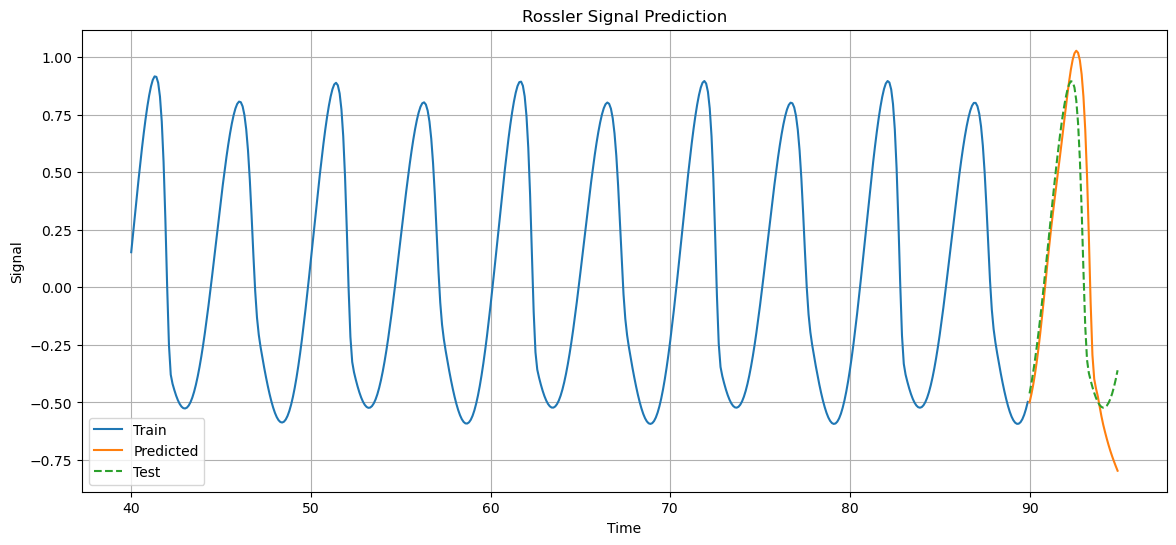

In [14]:
fig = plt.figure(figsize = (14,6))
#plt.plot(t_1[:len(y_train_1)],y_train_1,label='Train')
plt.plot(t_1,raw_seq_1,'-',label='Train')
plt.plot(t_window,predicciones_adelante_1,label='Predicted')
plt.plot(t_window,raw_seq_window,'--',label='Test')
plt.grid()
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Rossler Signal Prediction')
plt.legend()
plt.savefig('figures/rossler_signal_prediction_1.png')
plt.show()

In [17]:
# split into samples
y_train_2_bw, y_test_2_bw, predicciones_adelante_2_bw,valores_reales_2_bw = make_predictions(raw_seq_2_bw, look_back, n_features, raw_seq_window[::-1])

1/1 [==============================] - 0s 25ms/step


In [18]:
#y_train_2_bw, y_test_2_bw, predicciones_adelante_2_bw,valores_reales_2_bw = make_predictions(raw_seq_2_bw, look_back, n_features, window_size, indice_inicial)

y_train_2 = y_train_2_bw[::-1]
y_test_2 = y_test_2_bw[::-1]
predicciones_adelante_2 = predicciones_adelante_2_bw[::-1]
valores_reales_2 = valores_reales_2_bw[::-1]

# Calculamos el error
diferencia_2 = np.abs(predicciones_adelante_2-raw_seq_window)

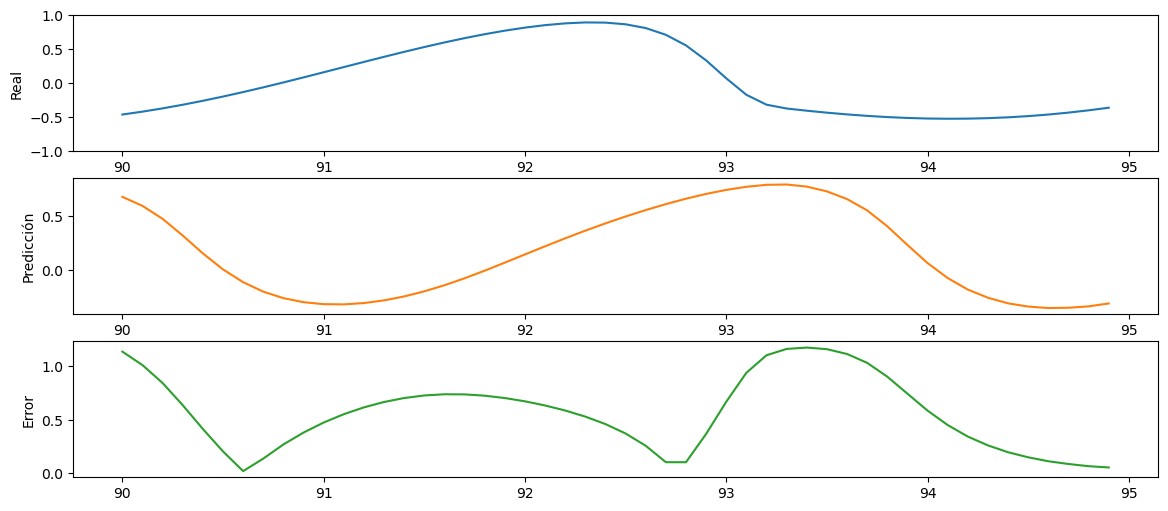

In [19]:
fig = plt.figure(figsize = (14,6))
plt.subplot(3,1,1)
plt.plot(t_window,raw_seq_window)
plt.ylabel('Real')
plt.ylim(-1,1)
plt.subplot(3,1,2)
plt.plot(t_window,predicciones_adelante_2,c='C1')
plt.ylabel('Predicción')
#plt.ylim(-1,1)
plt.subplot(3,1,3)
plt.plot(t_window,diferencia_2,c='C2')
plt.ylabel('Error')
#plt.ylim(0,5)
plt.show()

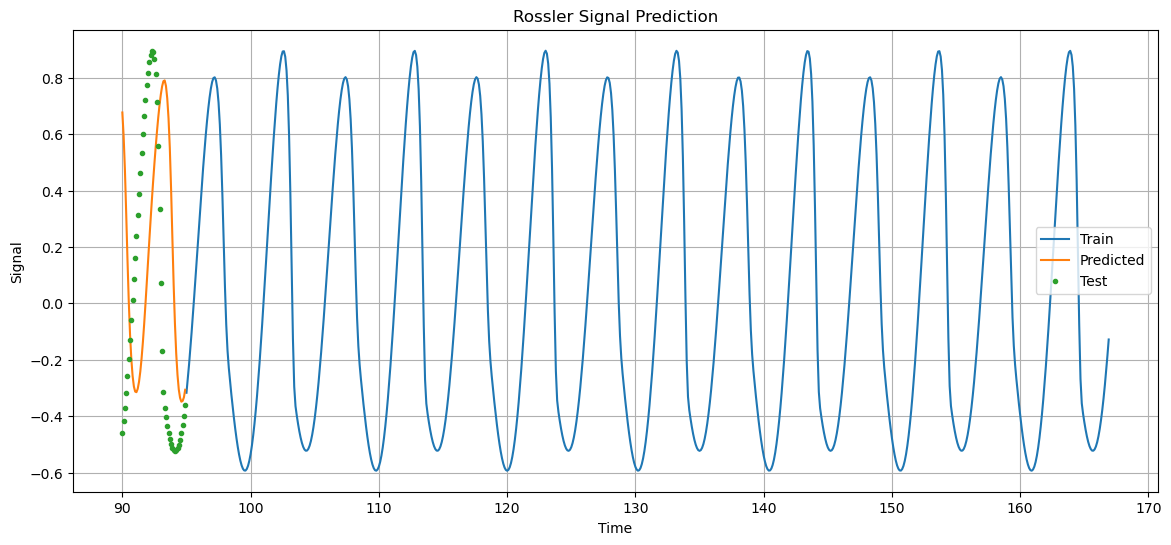

In [20]:
fig = plt.figure(figsize = (14,6))
#plt.plot(t_1[:len(y_train_1)],y_train_1,label='Train')
plt.plot(t_2,raw_seq_2,'-',label='Train')
plt.plot(t_window,predicciones_adelante_2,label='Predicted')
plt.plot(t_window,raw_seq_window,'.',label='Test')
plt.grid()
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Rossler Signal Prediction')
plt.legend()
plt.savefig('figures/rossler_signal_prediction_2.png')
plt.show()

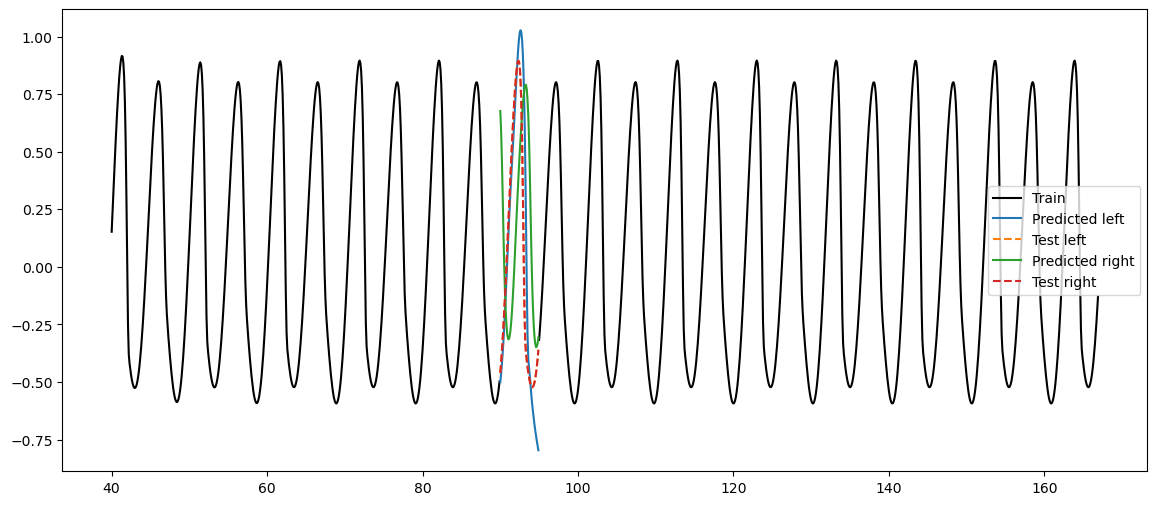

In [21]:
fig = plt.figure(figsize = (14,6))
plt.plot(t_1,raw_seq_1,'k',label='Train')
plt.plot(t_window,predicciones_adelante_1,label='Predicted left')
plt.plot(t_window,valores_reales_1,'--',label='Test left')
plt.plot(t_2,raw_seq_2,'k')
plt.plot(t_window,predicciones_adelante_2,label='Predicted right')
plt.plot(t_window,valores_reales_2,'--',label='Test right')
plt.legend()


In [22]:
prediction_mean = (predicciones_adelante_1 + predicciones_adelante_2)/2


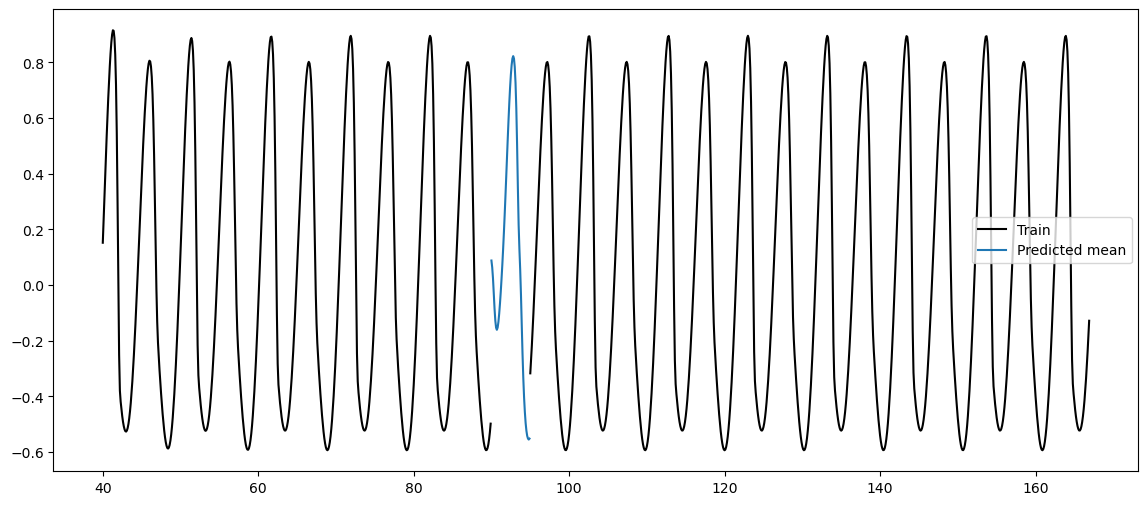

In [23]:
fig = plt.figure(figsize = (14,6))
plt.plot(t_1,raw_seq_1,'k',label='Train')
plt.plot(t_window,prediction_mean,label='Predicted mean')
plt.plot(t_2,raw_seq_2,'k')
plt.legend()
